# Plotting 

**Outline**:

1. Quick overview of plotting with yt
2. Choose your own plotting adventure...

## Plot types in yt

### Spatial Plots: reductions in data spatial dimensionality

![](solutions/figures/intro_figure_00_01_concatenated.png)


2D Spatial plots can be **axis-aligned** or **off-axis** (oriented with an arbitrary plane)

### Spatial Plots for Particles

![](solutions/figures/intro_figure_00_04_concatenated.png)

(SPH off axis support in yt 4.4.0!)

### Plots of statistical distributions

1D & 2D binned statistics with weighting: 

![](solutions/figures/intro_figure_00_02_concatenated.png)


### Volume rendering (more tomorrow...)

![](solutions/figures/intro_figure_00_03_concatenated.png)


## General Usage for Plotting API:

1. generate a plot object with some initital settings
2. optionally use plot **callbacks** to modify that plot
3. call method to display or save 

Two types of callbacks: 

* plot "adjustments" that modify existing plot attributes, method names start with `set_*`
* plot annotations that add new data, method names start with `annotate_*`


yt : [INFO     ] 2025-07-15 11:49:59,065 Sample dataset found in '/home/chavlin/data/yt_data/yt_sample_sets/IsolatedGalaxy/galaxy0030/galaxy0030'
yt : [INFO     ] 2025-07-15 11:49:59,269 Parameters: current_time              = 0.0060000200028298
yt : [INFO     ] 2025-07-15 11:49:59,270 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2025-07-15 11:49:59,271 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-07-15 11:49:59,272 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2025-07-15 11:49:59,273 Parameters: cosmological_simulation   = 0
Parsing Hierarchy : 100%|██████████████████| 173/173 [00:00<00:00, 10645.29it/s]
yt : [INFO     ] 2025-07-15 11:49:59,314 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2025-07-15 11:50:00,371 xlim = 0.250026 0.749974
yt : [INFO     ] 2025-07-15 11:50:00,371 ylim = 0.250026 0.749974
yt : [INFO     ] 2025-07-15 11:50:00,375 xlim = 0.250026 0.749974
yt : [INFO     ] 2025-07-1


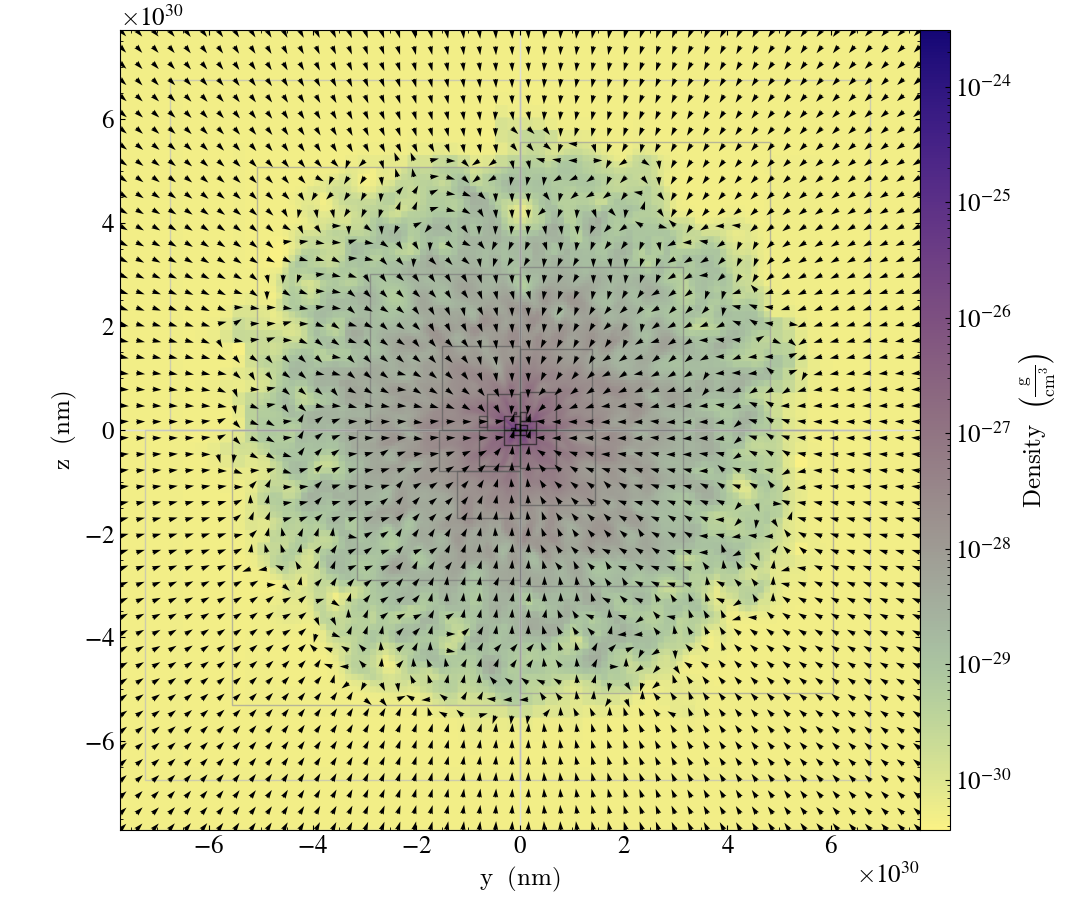

In [2]:
import yt 
ds = yt.load_sample("IsolatedGalaxy")

slc = yt.SlicePlot(ds, 'x', ('gas', 'density'), width=(0.5, 'Mpc')) # create a plot

# some plot adjustments
slc.set_cmap(('gas', 'density'), 'kelp_r')
slc.set_axes_unit('nm')

# some annotations
slc.annotate_grids()
slc.annotate_velocity(normalize=True)

# display the result (don't really have to do this in the notebook cell...)
slc.show()

## Quick examples of plot types

yt : [INFO     ] 2025-07-15 11:51:02,544 xlim = 0.250026 0.749974
yt : [INFO     ] 2025-07-15 11:51:02,545 ylim = 0.250026 0.749974
yt : [INFO     ] 2025-07-15 11:51:02,548 xlim = 0.250026 0.749974
yt : [INFO     ] 2025-07-15 11:51:02,549 ylim = 0.250026 0.749974
yt : [INFO     ] 2025-07-15 11:51:02,550 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



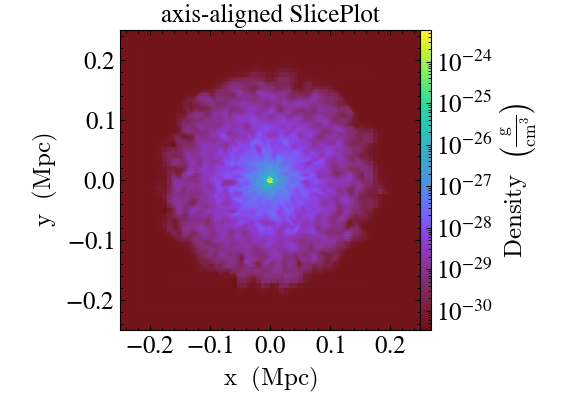

In [6]:
slc = yt.SlicePlot(ds, 
                   'z', 
                   ('gas', 'density'), 
                   width=(0.5, 'Mpc'))
slc.set_figure_size(3)
slc.annotate_title('axis-aligned SlicePlot')
slc

yt : [INFO     ] 2025-07-15 11:51:07,438 xlim = -0.249974 0.249974
yt : [INFO     ] 2025-07-15 11:51:07,439 ylim = -0.249974 0.249974
yt : [INFO     ] 2025-07-15 11:51:07,441 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



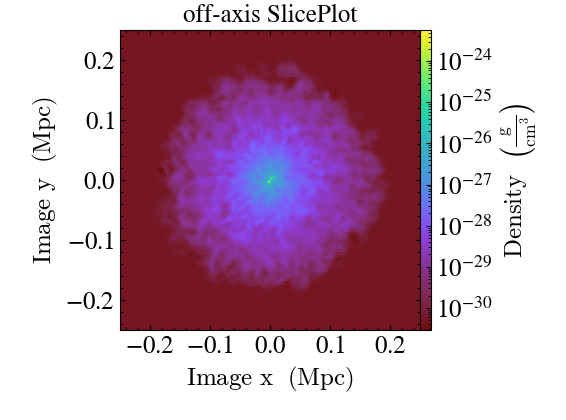

In [7]:
slc = yt.SlicePlot(ds, 
                   (1., 1., 1.), 
                   ('gas', 'density'), 
                   width=(0.5, 'Mpc'))
slc.set_figure_size(3)
slc.annotate_title('off-axis SlicePlot')
slc

yt : [INFO     ] 2025-07-15 11:51:25,543 Projection completed
yt : [INFO     ] 2025-07-15 11:51:25,544 xlim = 0.250026 0.749974
yt : [INFO     ] 2025-07-15 11:51:25,545 ylim = 0.250026 0.749974
yt : [INFO     ] 2025-07-15 11:51:25,548 xlim = 0.250026 0.749974
yt : [INFO     ] 2025-07-15 11:51:25,549 ylim = 0.250026 0.749974
yt : [INFO     ] 2025-07-15 11:51:25,551 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



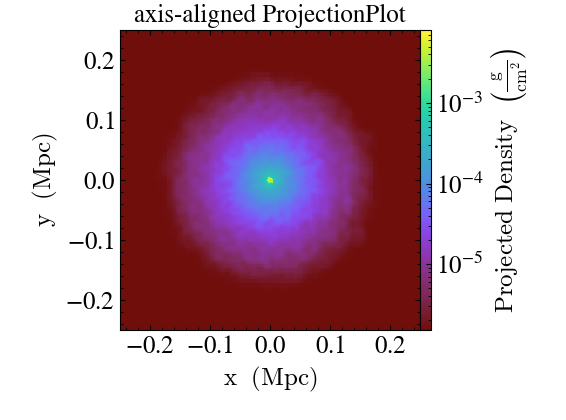

In [9]:
prj = yt.ProjectionPlot(ds, 'z', 
                        ('gas', 'density'), 
                        width=(0.5, 'Mpc'))
prj.set_figure_size(3)
prj.annotate_title('axis-aligned ProjectionPlot')

yt : [INFO     ] 2025-07-15 11:51:51,397 xlim = -0.249974 0.249974
yt : [INFO     ] 2025-07-15 11:51:51,399 ylim = -0.249974 0.249974
yt : [INFO     ] 2025-07-15 11:51:51,400 zlim = -0.866112 0.866112
yt : [INFO     ] 2025-07-15 11:51:51,401 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



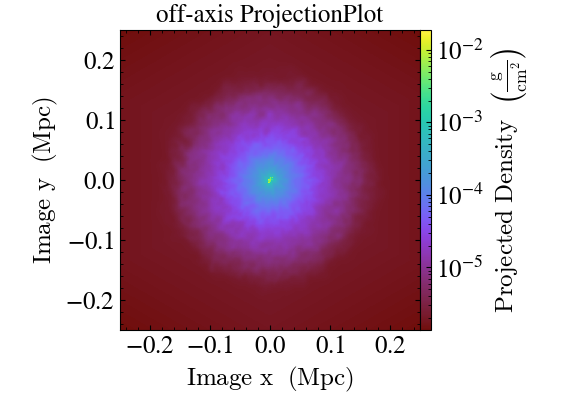

In [10]:
prj = yt.ProjectionPlot(ds, 
                        (1., 1., 1.), 
                        ('gas', 'density'), 
                        width=(0.5, 'Mpc'))
prj.set_figure_size(3)
prj.annotate_title('off-axis ProjectionPlot')

Same for SPH data!


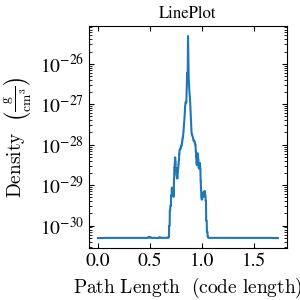

In [12]:
ln = yt.LinePlot(ds, 
                 [('gas', 'density'),], 
                 ds.domain_left_edge, 
                 ds.domain_right_edge, 
                 npoints=1000, 
                 figure_size=(3,3))
ln.annotate_title(('gas', 'density'), 'LinePlot')
ln


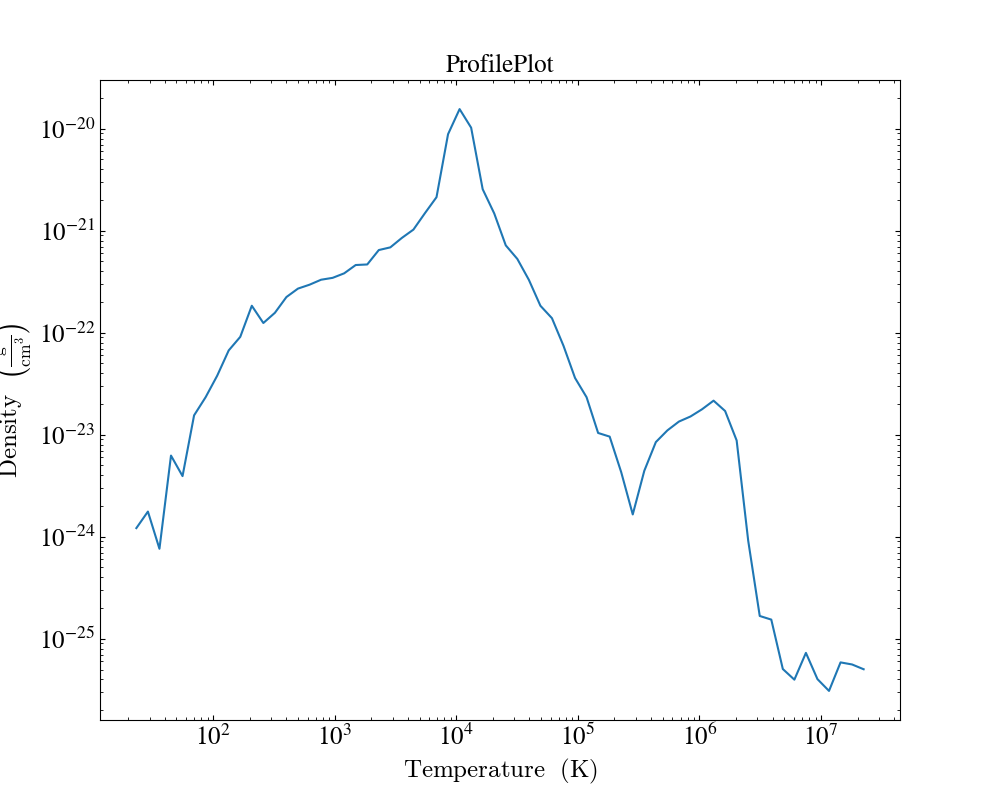

In [13]:
pp = yt.ProfilePlot(ds.all_data(), ("gas", "temperature"), ("gas", "density"), weight_field=None)
pp.annotate_title('ProfilePlot')
pp


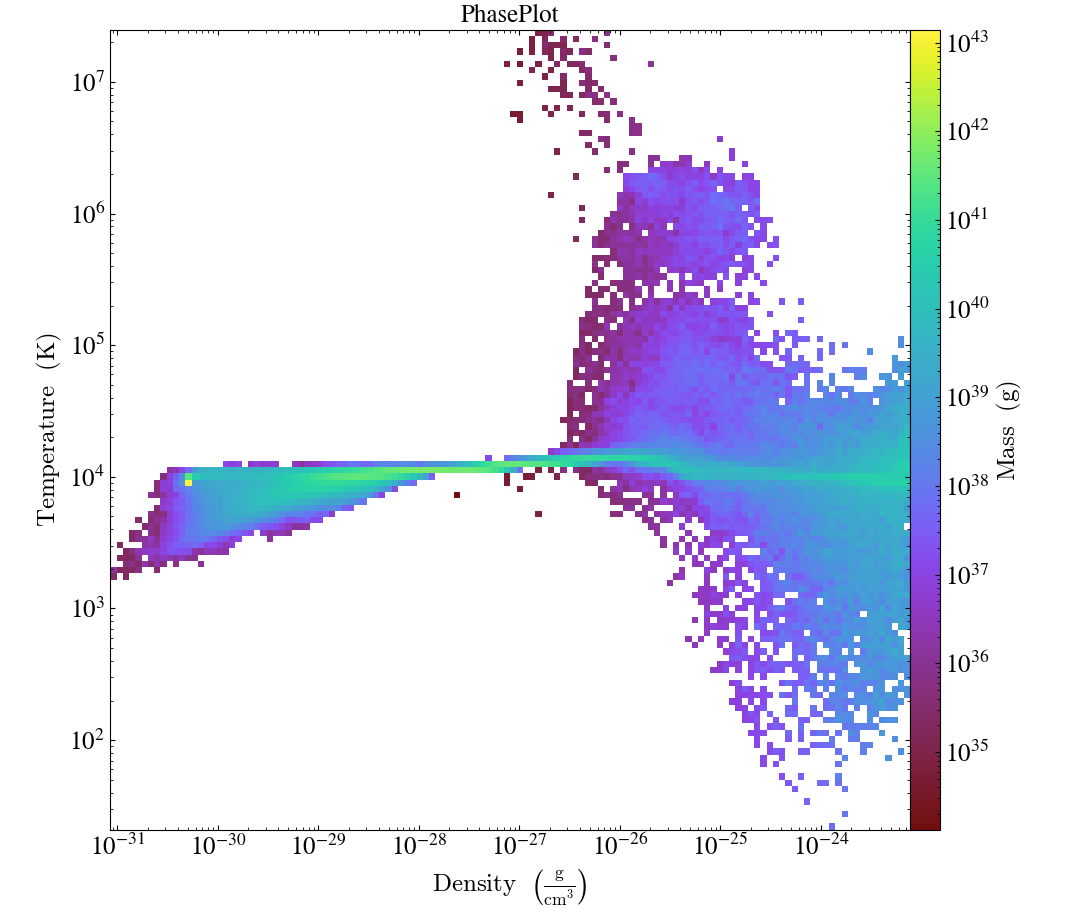

In [14]:
pp = yt.PhasePlot(
    ds.all_data(), ("gas", "density"), ("gas", "temperature"), [("gas", "mass")], weight_field=None
)
pp.annotate_title('PhasePlot')
pp

quick aside: 

### **but I just want a histogram!**

First: are you suuuuuure?

yt : [INFO     ] 2025-07-15 12:03:50,226 Sample dataset found in '/home/chavlin/data/yt_data/yt_sample_sets/enzo_tiny_cosmology/DD0046/DD0046'
yt : [INFO     ] 2025-07-15 12:03:50,323 Parameters: current_time              = 230.66527489234
yt : [INFO     ] 2025-07-15 12:03:50,324 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2025-07-15 12:03:50,325 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-07-15 12:03:50,326 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2025-07-15 12:03:50,327 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2025-07-15 12:03:50,327 Parameters: current_redshift          = -2.7810863612032e-09
yt : [INFO     ] 2025-07-15 12:03:50,328 Parameters: omega_lambda              = 0.727
yt : [INFO     ] 2025-07-15 12:03:50,329 Parameters: omega_matter              = 0.273
yt : [INFO     ] 2025-07-15 12:03:50,330 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-07-15 12:03:50,330


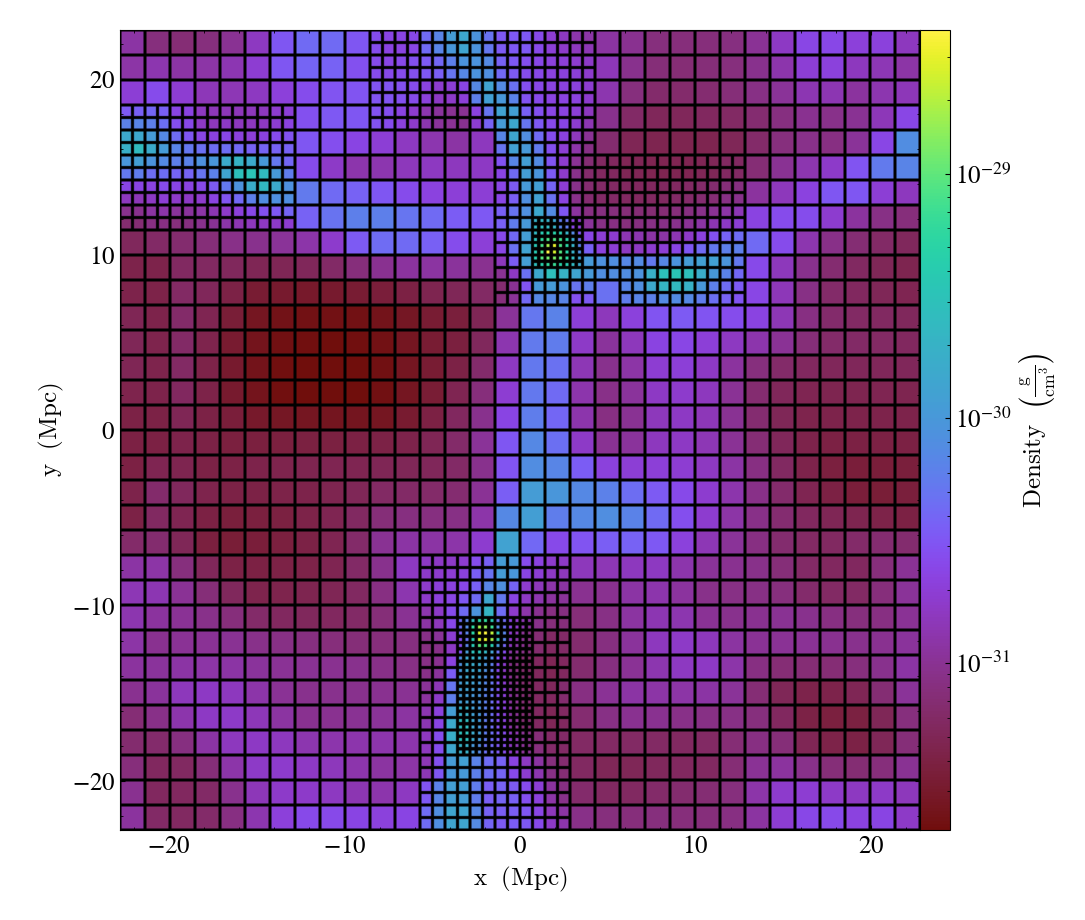

In [26]:
ds = yt.load_sample('enzo_tiny_cosmology')
slc = yt.SlicePlot(ds, 'z', ('gas', 'density'))
slc.annotate_cell_edges()  # a callback annotation!
slc

yt : [INFO     ] 2025-07-15 11:58:06,550 Projection completed
yt : [INFO     ] 2025-07-15 11:58:06,551 xlim = 0.000000 1.000000
yt : [INFO     ] 2025-07-15 11:58:06,552 ylim = 0.000000 1.000000
yt : [INFO     ] 2025-07-15 11:58:06,556 xlim = 0.000000 1.000000
yt : [INFO     ] 2025-07-15 11:58:06,557 ylim = 0.000000 1.000000
yt : [INFO     ] 2025-07-15 11:58:06,558 Making a fixed resolution buffer of (('index', 'ones')) 800 by 800



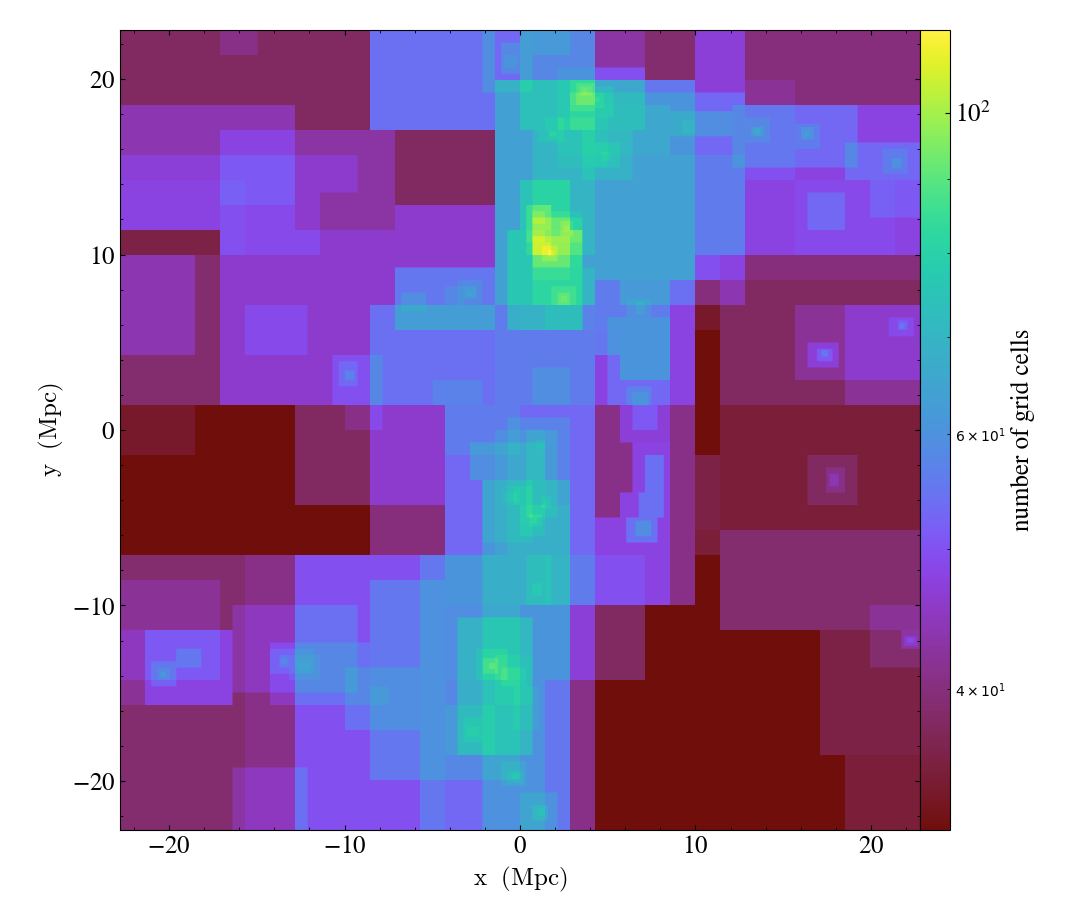

In [21]:
p = yt.ProjectionPlot(ds, 'z', ('index', 'ones'), method='sum')
p.set_colorbar_label(('index', 'ones'), 'number of grid cells')
p


**with variable-resolution data, raw histograms will reflect grid structure!**

SO if you're **still** sure you want a raw histogram that just counts occurrences (maybe you have uniformly gridded data, or you're doing some debugging), you can do that with:


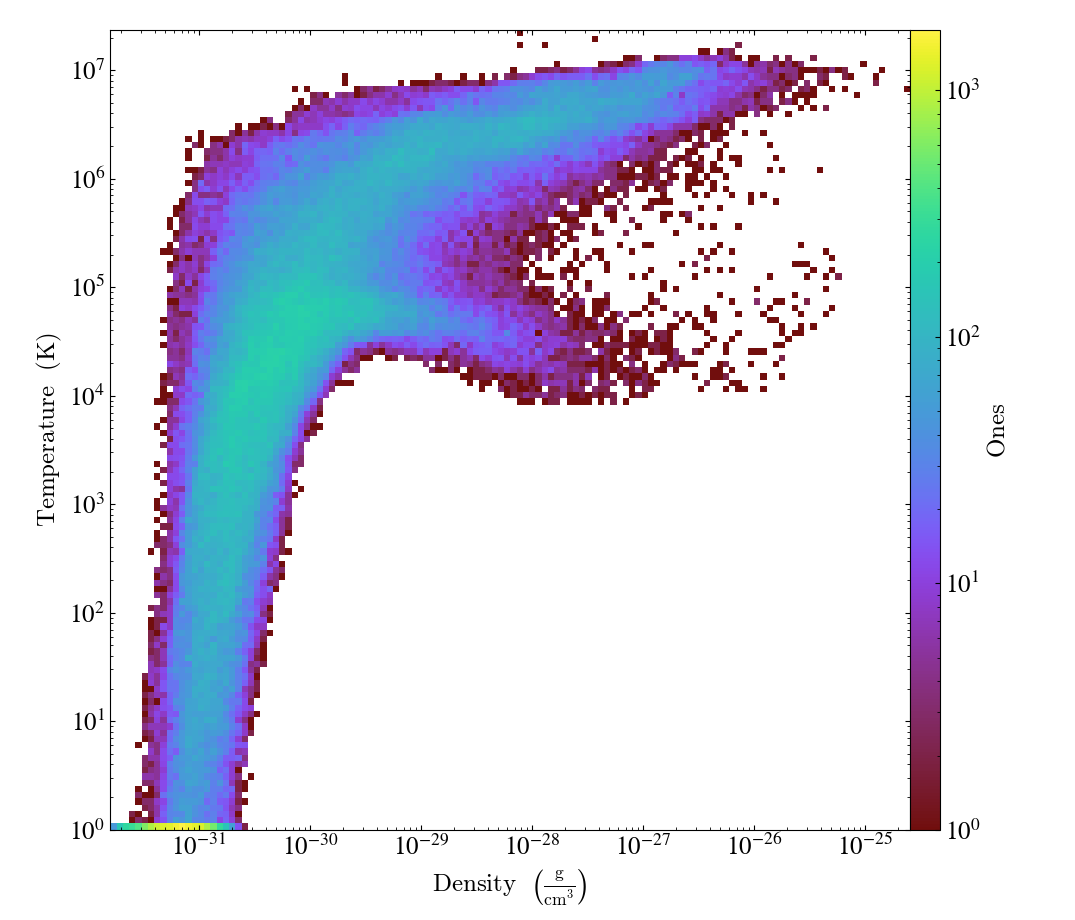

In [25]:
pp = yt.PhasePlot(
    ds.all_data(), 
    ("gas", "density"), 
    ("gas", "temperature"), 
    [("index", "ones")], 
    weight_field=None,     
)
pp

## Some limitations

Not all plot types and annotations support all datasets and geometries:

**non-cartesian** coordinates: 

* For spatial plots, axis-aligned slicing only
* No volume rendering (will come back to this tomorrow)

Datasets that are not grid-based:

* SPH Data: Volume rendering API not supported, good support for slicing and projections though!
* Unstructured grids: Slicing only

Some plot annotations require certain fields (`annotate_magnetic_field`) or data types (`annotate_mesh_lines` for unstructured grids only)